## 1. Airlines Dataset

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.cluster.hierarchy as sch
from sklearn.cluster import AgglomerativeClustering
from sklearn.cluster import KMeans
from sklearn.cluster import DBSCAN
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler

In [2]:
airlines = pd.read_csv("EastWestAirliness.csv")
airlines

,ID#,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?
0,1,28143,0,1,1,1,174,1,0,0,7000,0
1,2,19244,0,1,1,1,215,2,0,0,6968,0
2,3,41354,0,1,1,1,4123,4,0,0,7034,0
3,4,14776,0,1,1,1,500,1,0,0,6952,0
4,5,97752,0,4,1,1,43300,26,2077,4,6935,1
...,...,...,...,...,...,...,...,...,...,...,...,...
3994,4017,18476,0,1,1,1,8525,4,200,1,1403,1
3995,4018,64385,0,1,1,1,981,5,0,0,1395,1
3996,4019,73597,0,3,1,1,25447,8,0,0,1402,1
3997,4020,54899,0,1,1,1,500,1,500,1,1401,0


In [3]:
airlines.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3999 entries, 0 to 3998
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype
---  ------             --------------  -----
 0   ID#                3999 non-null   int64
 1   Balance            3999 non-null   int64
 2   Qual_miles         3999 non-null   int64
 3   cc1_miles          3999 non-null   int64
 4   cc2_miles          3999 non-null   int64
 5   cc3_miles          3999 non-null   int64
 6   Bonus_miles        3999 non-null   int64
 7   Bonus_trans        3999 non-null   int64
 8   Flight_miles_12mo  3999 non-null   int64
 9   Flight_trans_12    3999 non-null   int64
 10  Days_since_enroll  3999 non-null   int64
 11  Award?             3999 non-null   int64
dtypes: int64(12)
memory usage: 375.0 KB


In [4]:
airlines.shape

(3999, 12)

In [5]:
airlines.isna().sum() 

ID#                  0
Balance              0
Qual_miles           0
cc1_miles            0
cc2_miles            0
cc3_miles            0
Bonus_miles          0
Bonus_trans          0
Flight_miles_12mo    0
Flight_trans_12      0
Days_since_enroll    0
Award?               0
dtype: int64

In [6]:
airlines.describe()

,ID#,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?
count,3999.000000,3.999000e+03,3999.000000,3999.000000,3999.000000,3999.000000,3999.000000,3999.00000,3999.000000,3999.000000,3999.00000,3999.000000
mean,2014.819455,7.360133e+04,144.114529,2.059515,1.014504,1.012253,17144.846212,11.60190,460.055764,1.373593,4118.55939,0.370343
std,1160.764358,1.007757e+05,773.663804,1.376919,0.147650,0.195241,24150.967826,9.60381,1400.209171,3.793172,2065.13454,0.482957
min,1.000000,0.000000e+00,0.000000,1.000000,1.000000,1.000000,0.000000,0.00000,0.000000,0.000000,2.00000,0.000000
25%,1010.500000,1.852750e+04,0.000000,1.000000,1.000000,1.000000,1250.000000,3.00000,0.000000,0.000000,2330.00000,0.000000
50%,2016.000000,4.309700e+04,0.000000,1.000000,1.000000,1.000000,7171.000000,12.00000,0.000000,0.000000,4096.00000,0.000000
75%,3020.500000,9.240400e+04,0.000000,3.000000,1.000000,1.000000,23800.500000,17.00000,311.000000,1.000000,5790.50000,1.000000
max,4021.000000,1.704838e+06,11148.000000,5.000000,3.000000,5.000000,263685.000000,86.00000,30817.000000,53.000000,8296.00000,1.000000


### Hierarchy Clustering

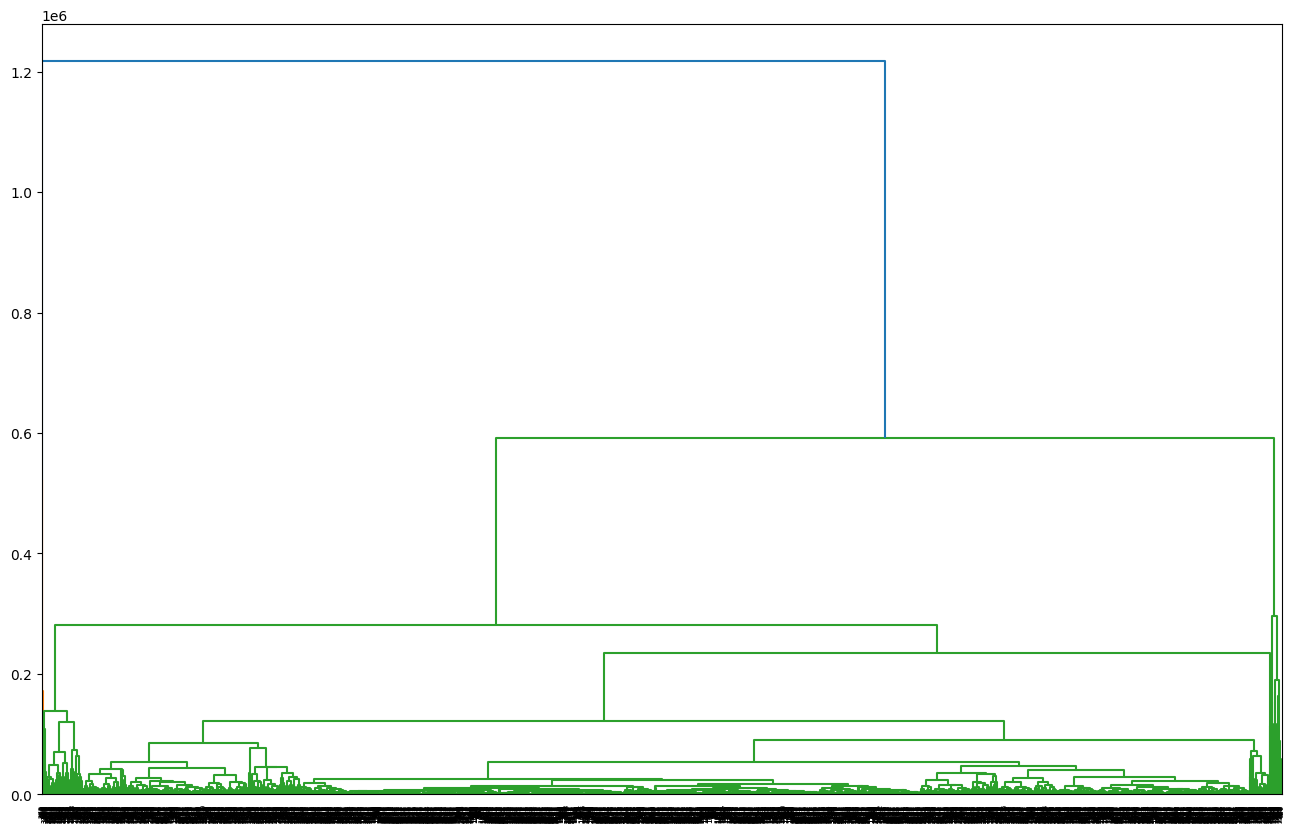

In [7]:
# create dendrogram
plt.figure(figsize = (16, 10));
dendrogram = sch.dendrogram(sch.linkage(airlines, method='average'))

In [8]:
# Agglomerative Clustering
hc = AgglomerativeClustering(n_clusters=5, affinity = 'euclidean', linkage = 'average')

In [9]:
# save clusters for chart
y_hc = hc.fit_predict(airlines)
Clusters=pd.DataFrame(y_hc,columns=['Clusters'])
Clusters

,Clusters
0,0
1,0
2,0
3,0
4,0
...,...
3994,0
3995,0
3996,0
3997,0


In [10]:
airlines1 = pd.concat([airlines,Clusters], axis=1)
airlines1

,ID#,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?,Clusters
0,1,28143,0,1,1,1,174,1,0,0,7000,0,0
1,2,19244,0,1,1,1,215,2,0,0,6968,0,0
2,3,41354,0,1,1,1,4123,4,0,0,7034,0,0
3,4,14776,0,1,1,1,500,1,0,0,6952,0,0
4,5,97752,0,4,1,1,43300,26,2077,4,6935,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
3994,4017,18476,0,1,1,1,8525,4,200,1,1403,1,0
3995,4018,64385,0,1,1,1,981,5,0,0,1395,1,0
3996,4019,73597,0,3,1,1,25447,8,0,0,1402,1,0
3997,4020,54899,0,1,1,1,500,1,500,1,1401,0,0


In [11]:
airlines1.sort_values("Clusters")

,ID#,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?,Clusters
0,1,28143,0,1,1,1,174,1,0,0,7000,0,0
2658,2678,27438,0,1,1,1,2528,6,2528,6,2490,0,0
2659,2679,14748,0,1,1,1,2210,7,0,0,2497,1,0
2660,2680,49514,0,1,1,1,4500,22,0,0,2569,0,0
2661,2681,7457,0,1,1,1,17131,5,0,0,2496,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
510,516,889456,1024,5,1,1,98959,29,850,4,6652,1,4
117,120,969559,0,1,1,1,2500,3,1000,2,7718,1,4
1188,1200,837979,0,1,1,1,18372,15,1450,4,5373,1,4
3772,3795,822321,0,5,1,1,138334,26,600,2,3288,1,4


### K-Means

In [12]:
kmeans = KMeans(n_clusters=14,random_state=0)
kmeans.fit(airlines)

KMeans(n_clusters=14, random_state=0)

In [13]:
kmeans.inertia_

1834070337748.0337

In [14]:
wcss = []
for i in range(1, 19):
    kmeans = KMeans(n_clusters=i,random_state=0)
    kmeans.fit(airlines)
    wcss.append(kmeans.inertia_)

In [15]:
wcss

[42967206847420.69,
 20828852094270.246,
 11794254039243.77,
 7554668286111.57,
 5775051202470.374,
 4546507928780.686,
 3702589069199.209,
 3276988157640.796,
 2902566130528.8154,
 2626868222415.187,
 2388857476451.363,
 2145927982985.3074,
 1970924985403.443,
 1834070337748.0337,
 1704025192843.4019,
 1600642706952.221,
 1471387695494.597,
 1403671270869.3867]

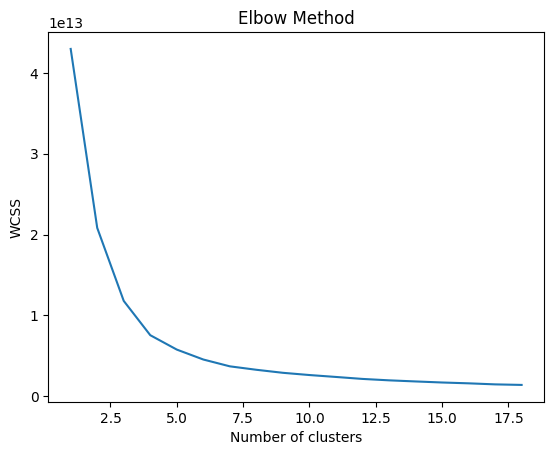

In [16]:
plt.plot(range(1, 19), wcss)
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

##### OR

In [17]:
#Build Cluster algorithm
from sklearn.cluster import KMeans
clusters_new = KMeans(7, random_state=0)
clusters_new.fit(airlines)

KMeans(n_clusters=7, random_state=0)

In [18]:
clusters_new.labels_

array([3, 3, 3, ..., 6, 6, 3])

In [19]:
# Converting array to dataframe
df = pd.DataFrame(clusters_new.labels_, columns =['Cluster ID'])

In [20]:
airlines2 = pd.concat([airlines,df], axis=1)
airlines2

,ID#,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?,Cluster ID
0,1,28143,0,1,1,1,174,1,0,0,7000,0,3
1,2,19244,0,1,1,1,215,2,0,0,6968,0,3
2,3,41354,0,1,1,1,4123,4,0,0,7034,0,3
3,4,14776,0,1,1,1,500,1,0,0,6952,0,3
4,5,97752,0,4,1,1,43300,26,2077,4,6935,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
3994,4017,18476,0,1,1,1,8525,4,200,1,1403,1,3
3995,4018,64385,0,1,1,1,981,5,0,0,1395,1,6
3996,4019,73597,0,3,1,1,25447,8,0,0,1402,1,6
3997,4020,54899,0,1,1,1,500,1,500,1,1401,0,6


In [21]:
airlines3=airlines2.drop(['ID#'], axis=1)

In [22]:
airlines3.groupby('Cluster ID').agg(['mean']).reset_index()

,Cluster ID,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?
,,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean
0,0,1.275126e+05,230.817708,3.006944,1.013889,1.041667,32397.265625,16.447917,783.171875,2.295139,4746.440972,0.456597
1,1,7.283600e+05,258.636364,3.500000,1.000000,1.136364,62470.818182,22.000000,1600.909091,5.727273,6189.681818,0.863636
2,2,3.948273e+05,465.400000,3.188235,1.035294,1.000000,48679.482353,19.176471,1522.247059,4.682353,5859.458824,0.717647
3,3,1.980550e+04,96.539196,1.372362,1.017588,1.000000,6018.991960,7.609045,214.708040,0.673869,3609.872864,0.286432
4,4,2.210648e+05,303.074510,2.917647,1.000000,1.000000,34492.215686,18.105882,1094.184314,3.137255,5107.835294,0.505882
5,5,1.288916e+06,1528.000000,3.000000,1.000000,1.000000,39098.000000,24.600000,2754.600000,11.400000,7821.600000,0.800000
6,6,6.479469e+04,113.580675,2.500938,1.011257,1.020638,21970.452158,14.001876,472.782364,1.359287,4293.329268,0.408068


In [23]:
airlines3['Cluster ID'].value_counts()

3    1990
6    1066
0     576
4     255
2      85
1      22
5       5
Name: Cluster ID, dtype: int64

### DBSCAN

In [24]:
airlines.head(4)

,ID#,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?
0,1,28143,0,1,1,1,174,1,0,0,7000,0
1,2,19244,0,1,1,1,215,2,0,0,6968,0
2,3,41354,0,1,1,1,4123,4,0,0,7034,0
3,4,14776,0,1,1,1,500,1,0,0,6952,0


In [25]:
a=airlines.values
a

array([[    1, 28143,     0, ...,     0,  7000,     0],
       [    2, 19244,     0, ...,     0,  6968,     0],
       [    3, 41354,     0, ...,     0,  7034,     0],
       ...,
       [ 4019, 73597,     0, ...,     0,  1402,     1],
       [ 4020, 54899,     0, ...,     1,  1401,     0],
       [ 4021,  3016,     0, ...,     0,  1398,     0]], dtype=int64)

In [26]:
stscaler = StandardScaler().fit(a)
X1 = stscaler.transform(a)

In [27]:
dbscan = DBSCAN(eps=0.82, min_samples=6)
dbscan.fit(X1)

DBSCAN(eps=0.82, min_samples=6)

In [28]:
#Noisy samples are given the label -1.
dbscan.labels_

array([0, 0, 0, ..., 1, 0, 0], dtype=int64)

In [29]:
cl=pd.DataFrame(dbscan.labels_,columns=['Cluster'])

In [30]:
airlines4 = pd.concat([airlines,cl],axis=1)
airlines4

,ID#,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?,Cluster
0,1,28143,0,1,1,1,174,1,0,0,7000,0,0
1,2,19244,0,1,1,1,215,2,0,0,6968,0,0
2,3,41354,0,1,1,1,4123,4,0,0,7034,0,0
3,4,14776,0,1,1,1,500,1,0,0,6952,0,0
4,5,97752,0,4,1,1,43300,26,2077,4,6935,1,-1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
3994,4017,18476,0,1,1,1,8525,4,200,1,1403,1,1
3995,4018,64385,0,1,1,1,981,5,0,0,1395,1,1
3996,4019,73597,0,3,1,1,25447,8,0,0,1402,1,1
3997,4020,54899,0,1,1,1,500,1,500,1,1401,0,0


In [31]:
airlines4['Cluster'].value_counts()

 0    2182
 1     903
-1     879
 3      16
 4       7
 5       7
 2       5
Name: Cluster, dtype: int64

# 2. Crime Dataset 

In [32]:
c = pd.read_csv("crime_data.csv")
c.head()

,Unnamed: 0,Murder,Assault,UrbanPop,Rape
0,Alabama,13.2,236,58,21.2
1,Alaska,10.0,263,48,44.5
2,Arizona,8.1,294,80,31.0
3,Arkansas,8.8,190,50,19.5
4,California,9.0,276,91,40.6


In [33]:
crime=c.rename({'Unnamed: 0':'States'},axis=1)
crime.tail()

,States,Murder,Assault,UrbanPop,Rape
45,Virginia,8.5,156,63,20.7
46,Washington,4.0,145,73,26.2
47,West Virginia,5.7,81,39,9.3
48,Wisconsin,2.6,53,66,10.8
49,Wyoming,6.8,161,60,15.6


In [34]:
#crime.States.value_counts()

In [35]:
crime.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   States    50 non-null     object 
 1   Murder    50 non-null     float64
 2   Assault   50 non-null     int64  
 3   UrbanPop  50 non-null     int64  
 4   Rape      50 non-null     float64
dtypes: float64(2), int64(2), object(1)
memory usage: 2.1+ KB


In [36]:
crime.isna().sum() 

States      0
Murder      0
Assault     0
UrbanPop    0
Rape        0
dtype: int64

### Hierarchy Clustering

In [37]:
n = MinMaxScaler()
data= n.fit_transform(crime.iloc[:,1:].to_numpy())
crimes = pd.DataFrame(data, columns = crime.columns[1:])
crimes.head(4)

,Murder,Assault,UrbanPop,Rape
0,0.746988,0.654110,0.440678,0.359173
1,0.554217,0.746575,0.271186,0.961240
2,0.439759,0.852740,0.813559,0.612403
3,0.481928,0.496575,0.305085,0.315245


### Clustering

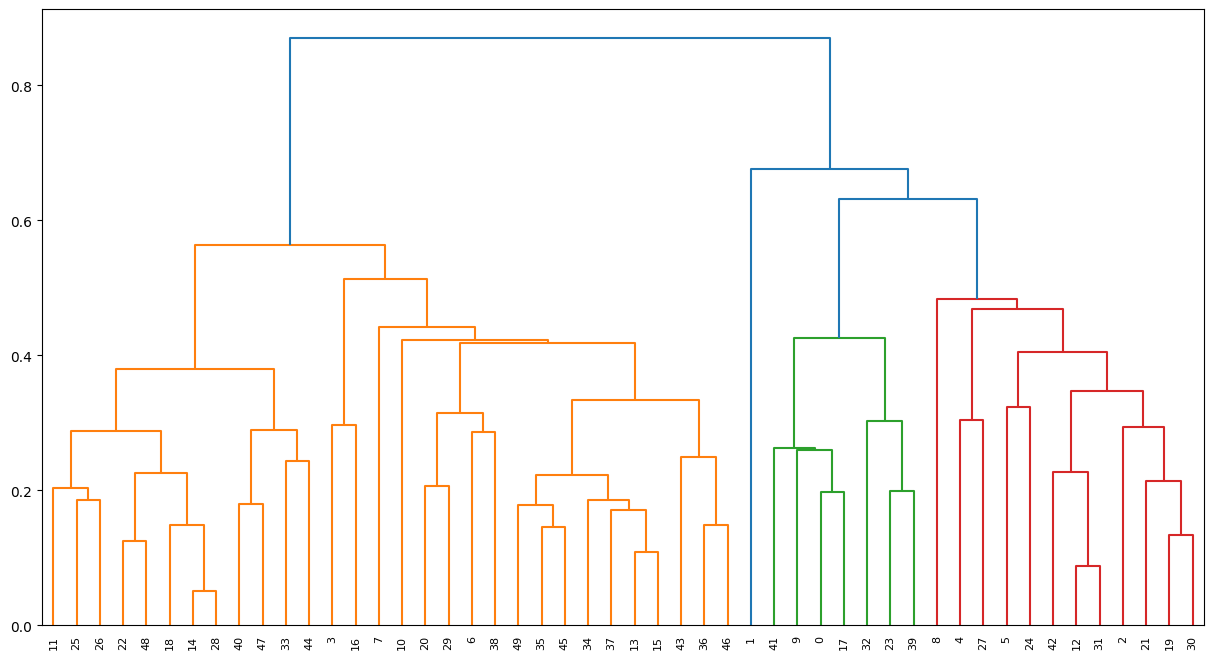

In [38]:
# create dendrogram
fig = plt.figure(figsize=(15,8))
dendrogram = sch.dendrogram(sch.linkage(crimes, method='average'))

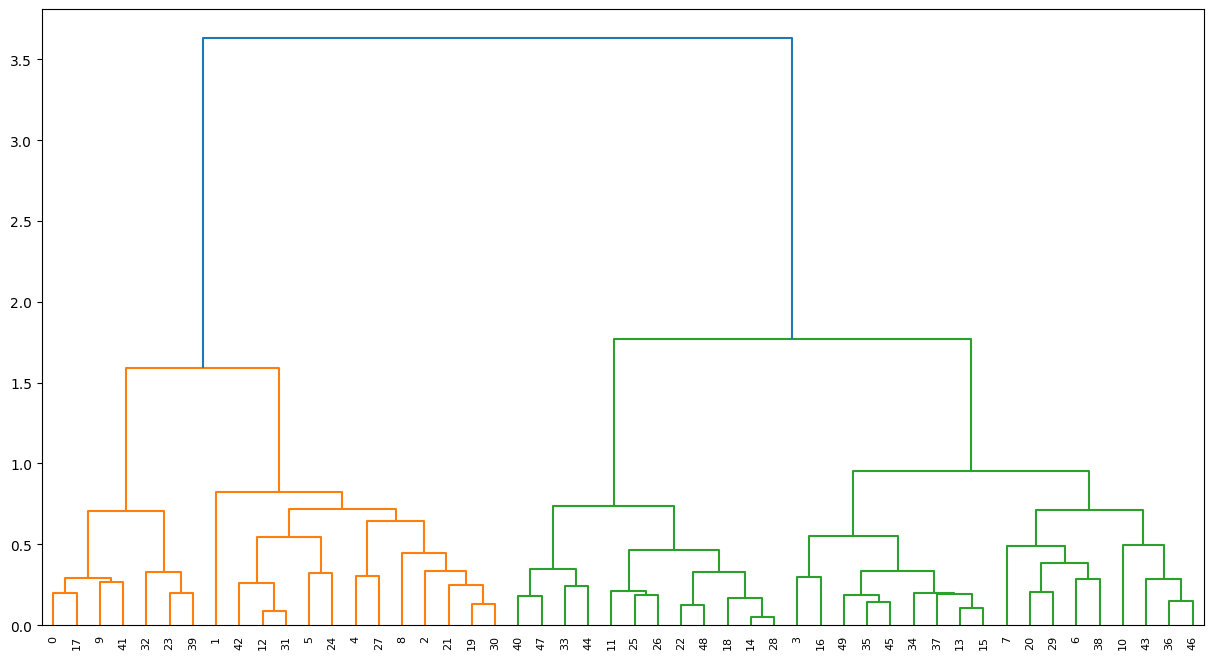

In [39]:
# create dendrogram
fig = plt.figure(figsize=(15,8))
dendrogram = sch.dendrogram(sch.linkage(crimes, method='ward'))

In [40]:
# create clusters
hc1 = AgglomerativeClustering(n_clusters=4, affinity = 'euclidean', linkage = 'average')

In [41]:
# save clusters for chart
y2 = hc1.fit_predict(crimes)
cc = pd.DataFrame(y2,columns=['Clusters'])
cc.head(6)

,Clusters
0,3
1,2
2,1
3,0
4,1
5,1


In [42]:
crimes2 = pd.concat([crime,cc],axis=1)
crimes2.head(7)

,States,Murder,Assault,UrbanPop,Rape,Clusters
0,Alabama,13.2,236,58,21.2,3
1,Alaska,10.0,263,48,44.5,2
2,Arizona,8.1,294,80,31.0,1
3,Arkansas,8.8,190,50,19.5,0
4,California,9.0,276,91,40.6,1
5,Colorado,7.9,204,78,38.7,1
6,Connecticut,3.3,110,77,11.1,0


In [43]:
crimes2.sort_values("Clusters").reset_index()

,index,States,Murder,Assault,UrbanPop,Rape,Clusters
0,49,Wyoming,6.8,161,60,15.6,0
1,28,New Hampshire,2.1,57,56,9.5,0
2,34,Ohio,7.3,120,75,21.4,0
3,26,Nebraska,4.3,102,62,16.5,0
4,25,Montana,6.0,109,53,16.4,0
5,48,Wisconsin,2.6,53,66,10.8,0
6,35,Oklahoma,6.6,151,68,20.0,0
7,22,Minnesota,2.7,72,66,14.9,0
8,36,Oregon,4.9,159,67,29.3,0
9,20,Massachusetts,4.4,149,85,16.3,0


In [44]:
crimes2['Clusters'].value_counts()

0    30
1    12
3     7
2     1
Name: Clusters, dtype: int64

### K-Means

In [45]:
kmeans = KMeans(n_clusters=4,random_state=0)
kmeans.fit(crimes)

KMeans(n_clusters=4, random_state=0)

In [46]:
kmeans.inertia_

3.683456153585913

In [47]:
wcss = []
for i in range(1, 8):
    kmeans = KMeans(n_clusters=i,random_state=0)
    kmeans.fit(crimes)
    wcss.append(kmeans.inertia_)

In [48]:
wcss

[13.184122550256443,
 6.5968938679461955,
 5.010878493006417,
 3.683456153585913,
 3.2250722560447906,
 2.8520398885211113,
 2.5848664114310447]

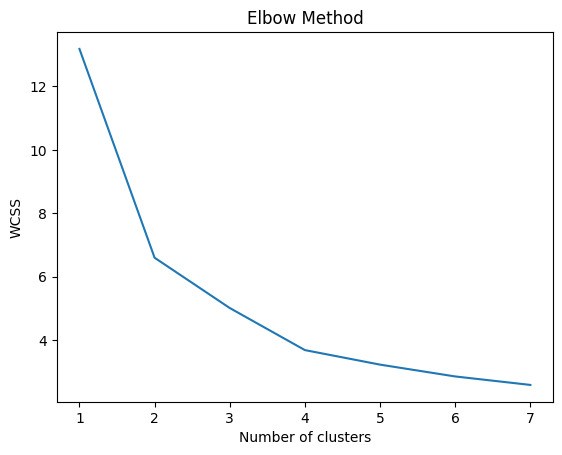

In [49]:
plt.plot(range(1, 8), wcss)
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

In [50]:
#Build Cluster algorithm
cc2 = KMeans(4, random_state=8)
cc2.fit(crimes)

KMeans(n_clusters=4, random_state=8)

In [51]:
cc2.labels_

array([1, 3, 3, 1, 3, 3, 0, 0, 3, 1, 0, 2, 3, 0, 2, 0, 2, 1, 2, 3, 0, 3,
       2, 1, 0, 2, 2, 3, 2, 0, 3, 3, 1, 2, 0, 0, 0, 0, 0, 1, 2, 1, 3, 0,
       2, 0, 0, 2, 2, 0])

In [52]:
# Converting array to dataframe
df2 = pd.DataFrame(cc2.labels_, columns =['clusters'])

In [53]:
crimes3 = pd.concat([crime,df2], axis=1)
crimes3.head(4)

,States,Murder,Assault,UrbanPop,Rape,clusters
0,Alabama,13.2,236,58,21.2,1
1,Alaska,10.0,263,48,44.5,3
2,Arizona,8.1,294,80,31.0,3
3,Arkansas,8.8,190,50,19.5,1


In [54]:
crimes3['clusters'].value_counts()

0    17
2    13
3    12
1     8
Name: clusters, dtype: int64

In [55]:
crimes3.groupby('clusters').agg(['mean'])

C:\Users\Prakash\AppData\Local\Temp\ipykernel_8408\1173982413.py:1: FutureWarning: ['States'] did not aggregate successfully. If any error is raised this will raise in a future version of pandas. Drop these columns/ops to avoid this warning.
  crimes3.groupby('clusters').agg(['mean'])


,Murder,Assault,UrbanPop,Rape
,mean,mean,mean,mean
clusters,,,,
0,5.852941,141.176471,73.647059,19.335294
1,13.937500,243.625000,53.750000,21.412500
2,3.600000,78.538462,52.076923,12.176923
3,10.966667,264.000000,76.500000,33.608333


### DBSCAN

In [56]:
array = crimes.values
#array

In [57]:
stscaler = StandardScaler().fit(array)
X2 = stscaler.transform(array)

In [58]:
X2

array([[ 1.25517927,  0.79078716, -0.52619514, -0.00345116],
       [ 0.51301858,  1.11805959, -1.22406668,  2.50942392],
       [ 0.07236067,  1.49381682,  1.00912225,  1.05346626],
       [ 0.23470832,  0.23321191, -1.08449238, -0.18679398],
       [ 0.28109336,  1.2756352 ,  1.77678094,  2.08881393],
       [ 0.02597562,  0.40290872,  0.86954794,  1.88390137],
       [-1.04088037, -0.73648418,  0.79976079, -1.09272319],
       [-0.43787481,  0.81502956,  0.45082502, -0.58583422],
       [ 1.76541475,  1.99078607,  1.00912225,  1.1505301 ],
       [ 2.22926518,  0.48775713, -0.38662083,  0.49265293],
       [-0.57702994, -1.51224105,  1.21848371, -0.11129987],
       [-1.20322802, -0.61527217, -0.80534376, -0.75839217],
       [ 0.60578867,  0.94836277,  1.21848371,  0.29852525],
       [-0.13637203, -0.70012057, -0.03768506, -0.0250209 ],
       [-1.29599811, -1.39102904, -0.5959823 , -1.07115345],
       [-0.41468229, -0.67587817,  0.03210209, -0.34856705],
       [ 0.44344101, -0.

In [59]:
dbscan2 = DBSCAN(eps=0.98, min_samples=3)
dbscan2.fit(X2)

DBSCAN(eps=0.98, min_samples=3)

In [60]:
#Noisy samples are given the label -1.
dbscan2.labels_

array([ 0, -1, -1, -1, -1, -1,  1, -1, -1,  0, -1,  1,  2,  1,  1,  1,  1,
        0,  1,  3,  1,  3,  1,  0, -1,  1,  1, -1,  1,  1,  3,  2, -1,  1,
        1,  1,  1,  1,  1,  0,  1,  0,  2,  1, -1,  1,  1,  1,  1,  1],
      dtype=int64)

In [61]:
c2 = pd.DataFrame(dbscan2.labels_,columns=['Cluster ID'])
c2.value_counts()

Cluster ID
 1            26
-1            12
 0             6
 2             3
 3             3
dtype: int64

In [62]:
crimes4 = pd.concat([crime,c2],axis=1)
crimes4

,States,Murder,Assault,UrbanPop,Rape,Cluster ID
0,Alabama,13.2,236,58,21.2,0
1,Alaska,10.0,263,48,44.5,-1
2,Arizona,8.1,294,80,31.0,-1
3,Arkansas,8.8,190,50,19.5,-1
4,California,9.0,276,91,40.6,-1
5,Colorado,7.9,204,78,38.7,-1
6,Connecticut,3.3,110,77,11.1,1
7,Delaware,5.9,238,72,15.8,-1
8,Florida,15.4,335,80,31.9,-1
9,Georgia,17.4,211,60,25.8,0
